In [952]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns

In [953]:
#a két dataframe beolvasása
df1 = pd.read_excel('csv/rg.xls')
df2 = pd.read_csv('csv/ind.csv')
df2_original = pd.read_csv('csv/ind.csv')
kezdodatum = 1970

In [954]:
#df2 tisztítása
df2.columns = df2.columns.str.strip()
df2 = df2.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_gdp = df2[['Country', 'Year','Gross Domestic Product (GDP)']]
df_gdp = df_gdp.rename(columns={'Country' : 'Country Name'})

df_pivot = df_gdp.pivot(index = 'Country Name',columns='Year', values= 'Gross Domestic Product (GDP)')
columns_to_drop = [col for col in df_pivot.columns if int(col) < kezdodatum]
df_pivot = df_pivot.drop(columns=columns_to_drop, axis=1)
df2 = df_pivot.reset_index().rename_axis(None, axis=1).dropna()

In [955]:
#df1 tisztítása
evek = [str(i) for i in range(1960, kezdodatum)]
evek.extend(['2022', '2023'])
df1.drop(columns=evek, inplace=True)
df1.dropna(inplace=True)
df1.reset_index(drop=True, inplace=True)

In [956]:
#közös dataframe és reál gdp
df1_countrynames = df1['Country Name']
df2_countrynames = df2['Country Name']
df2 = df2[df2['Country Name'].isin(df1_countrynames)]
df1 = df1[df1['Country Name'].isin(df2_countrynames)]
df1 = df1.sort_values(by='Country Name')
df2 = df2.sort_values(by='Country Name')
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

df3 = df2.copy()
for col in df3:
    if(col != 'Country Name'):
        df3[col] = df3[col].div(df1[str(col)])*100

In [957]:
#population dataframe
df2_original.columns = df2_original.columns.str.strip()
df2_original = df2_original.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_pop = df2_original[['Country', 'Year','Population']]
df_pop = df_pop.rename(columns={'Country' : 'Country Name'})

df_pivot2 = df_pop.pivot(index = 'Country Name',columns='Year', values= 'Population')
columns_to_drop2 = [col for col in df_pivot2.columns if int(col) < kezdodatum]
df_pivot2 = df_pivot2.drop(columns=columns_to_drop2, axis=1)
df2_original = df_pivot2.reset_index().rename_axis(None, axis=1).dropna()

df2_original = df2_original[df2_original['Country Name'].isin(df1_countrynames)]
df2_original = df2_original.sort_values(by='Country Name')
df2_original.reset_index(drop=True, inplace=True)

In [958]:
#plot függvény
def plot_real_vs_nominal(country_name, real_df = df3,nominal_df = df2):
    sns.set_theme(rc={'figure.figsize':(10,4)})
    x_ertekek = np.array(real_df.columns[1:].tolist())
    y_ertekek = np.array(real_df.loc[real_df['Country Name'] == country_name].values.flatten().tolist()[1:])
    sns.lineplot(x_ertekek, y_ertekek)
    sns.regplot(x_ertekek, y_ertekek)
    x = nominal_df.columns[1:]
    y = nominal_df.loc[nominal_df['Country Name'] == country_name].values.flatten().tolist()[1:]
    slope, intercept, r, p, std_err = stats.linregress(x_ertekek, y_ertekek)
    def myfunc(x):
        return slope * x + intercept

    mymodel = list(map(myfunc, x_ertekek))
    sns.lineplot(x_ertekek, mymodel, color = 'red')
    sns.lineplot(x, y)
    plt.show
    return r**2

def plot_real(country_name, real_df = df3,nominal_df = df2):
    sns.set_theme(rc={'figure.figsize':(10,4)})
    x_ertekek = np.array(real_df.columns[1:].tolist())
    y_ertekek = np.array(real_df.loc[real_df['Country Name'] == country_name].values.flatten().tolist()[1:])
    sns.lineplot(x_ertekek, y_ertekek)
    sns.regplot(x_ertekek, y_ertekek, scatter=False)
    # x = nominal_df.columns[1:]
    # y = nominal_df.loc[nominal_df['Country Name'] == country_name].values.flatten().tolist()[1:]
    slope, intercept, r, p, std_err = stats.linregress(x_ertekek, y_ertekek)
    def myfunc(x):
        return slope * x + intercept

    mymodel = list(map(myfunc, x_ertekek))
    sns.lineplot(x_ertekek, mymodel, color = 'red')
    # sns.lineplot(x, y)
    plt.show
    return r**2

In [959]:
#plot_capita függvény
def plot_real_vs_nominal_per_capita(country_name, real_df = df3, nominal_df = df2, population_df = df2_original):
    population_array = np.array(population_df.loc[population_df['Country Name'] == country_name].values.flatten().tolist()[1:])
    sns.set_theme(rc={'figure.figsize':(10,4)})
    x_ertekek = np.array(real_df.columns[1:].tolist())
    y_ertekek = np.array(real_df.loc[real_df['Country Name'] == country_name].values.flatten().tolist()[1:])/population_array
    sns.regplot(x_ertekek, y_ertekek, scatter=False)
    x = np.array(nominal_df.columns[1:].tolist())
    y = np.array(nominal_df.loc[nominal_df['Country Name'] == country_name].values.flatten().tolist()[1:])/population_array
    slope, intercept, r, p, std_err = stats.linregress(x_ertekek, y_ertekek)
    def myfunc(x):
        return slope * x + intercept

    mymodel = list(map(myfunc, x_ertekek))
    sns.lineplot(x_ertekek, y_ertekek)
    sns.lineplot(x=x, y=y)
    plt.show
    return r**2

#plot real capita
def plot_real_per_capita(country_name, real_df = df3, nominal_df = df2, population_df = df2_original):
    population_array = np.array(population_df.loc[population_df['Country Name'] == country_name].values.flatten().tolist()[1:])
    x_ertekek = np.array(real_df.columns[1:].tolist())
    y_ertekek = np.array(real_df.loc[real_df['Country Name'] == country_name].values.flatten().tolist()[1:])/population_array
    
    
    
    slope, intercept, r, p, std_err = stats.linregress(x_ertekek, y_ertekek)
    def myfunc(x):
        return slope * x + intercept

    mymodel = list(map(myfunc, x_ertekek))
    sns.set_theme(rc={'figure.figsize':(10,4)})
    # sns.lineplot(x = x_ertekek,y = y_ertekek)
    sns.regplot(x_ertekek, y_ertekek)
    plt.show
    return r**2

In [960]:
#meredekség
def real_vs_nominal_slope(country_name, real_df=df3):
    x_ertekek = np.array(real_df.columns[1:].tolist())
    y_ertekek = np.array(real_df.loc[real_df['Country Name'] == country_name].values.flatten().tolist()[1:])
    slope, intercept, r, p, std_err = stats.linregress(x_ertekek, y_ertekek)
    return slope

In [961]:
#meredekség per capita
def real_vs_nominal_per_capita_slope(country_name, population_df = df2_original, real_df=df3):
    population_array = np.array(population_df.loc[population_df['Country Name'] == country_name].values.flatten().tolist()[1:])
    x_ertekek = np.array(real_df.columns[1:].tolist())
    y_ertekek = np.array(real_df.loc[real_df['Country Name'] == country_name].values.flatten().tolist()[1:])/population_array
    slope, intercept, r, p, std_err = stats.linregress(x_ertekek, y_ertekek)
    return slope

In [962]:
def plot_together(country_name, real_df = df3,  population_df = df2_original, nominal_df = df2):
    population_array = np.array(population_df.loc[population_df['Country Name'] == country_name].values.flatten().tolist()[1:])
    x_real_per_cap = np.array(real_df.columns[1:].tolist())
    y_real_per_cap = np.array(real_df.loc[real_df['Country Name'] == country_name].values.flatten().tolist()[1:])/population_array
    x_real = x_real_per_cap = np.array(real_df.columns[1:].tolist())
    y_real = np.array(real_df.loc[real_df['Country Name'] == country_name].values.flatten().tolist()[1:])
    x_nominal_per_cap = np.array(nominal_df.columns[1:].tolist())
    y_nominal_per_cap = np.array(nominal_df.loc[nominal_df['Country Name'] == country_name].values.flatten().tolist()[1:])/population_array
    x_nominal = np.array(nominal_df.columns[1:].tolist())
    y_nominal = np.array(nominal_df.loc[nominal_df['Country Name'] == country_name].values.flatten().tolist()[1:])

# Create a figure with a 2x2 grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(country_name + "'s GDP Statistics")
# Plot on each subplot
    axes[0,0].plot(x_real, y_real, label = 'Real GDP')
    axes[0, 0].plot(x_nominal ,y_nominal, label = 'Nominal GDP')
    axes[0, 0].set_title('Real GDP vs Nominal GDP')
    axes[0, 0].set_xlabel('Years')
    axes[0, 0].set_ylabel('GDP')
    axes[0,0].legend()

    axes[0, 1].plot(x_real_per_cap, y_real_per_cap)
    axes[0,1].plot(x_nominal_per_cap, y_nominal_per_cap) 
    axes[0, 1].set_title('Real GDP per Capita vs Nominal GDP per Capita')
    axes[0, 1].set_xlabel('Years')
    axes[0, 1].set_ylabel('GDP')
    max_y_index = np.argmax(y_real_per_cap)
    max_y_value = int(round(y_real_per_cap[max_y_index]))

    # Mark the maximum y value with a marker
    axes[0,1].scatter(x_real_per_cap[max_y_index], max_y_value, color='red', label=f'Max: {max_y_value:.0f}$/Cap')
    axes[0,1].legend()
    
    slope_real, intercept, r_real, p, std_err = stats.linregress(x_real, y_real)
    line_data = 'slope=' + str(round(slope_real)) + '\nr squared=' + str(round(r_real, 3))
    sns.regplot(x=x_real, y=y_real, ax=axes[1, 0], label=line_data)
    axes[1, 0].set_title('Real GDP with Regression Line: Growth Trend')
    axes[1, 0].set_xlabel('Years')
    axes[1, 0].set_ylabel('GDP')
    axes[1, 0].legend(loc = 'upper left')
    
    slope_real_per_cap, intercept, r_real, p, std_err = stats.linregress(x_real_per_cap, y_real_per_cap)
    axes[1, 1].plot(x_real_per_cap, y_real_per_cap)
    def myfunc(x):
        return slope_real_per_cap * x + intercept

    mymodel = list(map(myfunc, x_real_per_cap))
    axes[1, 1].plot(x_real_per_cap, mymodel, color = 'red', label='standard error=' + str(round(std_err)))
    axes[1, 1].set_title('Real GDP per Capita with Regression Line')
    axes[1, 1].set_xlabel('Years')
    axes[1, 1].set_ylabel('GDP')
    axes[1, 1].legend(loc = 'upper left')
    

# Adjust layout to prevent overlap
    plt.tight_layout()

# Show or save the plot
    plt.show()

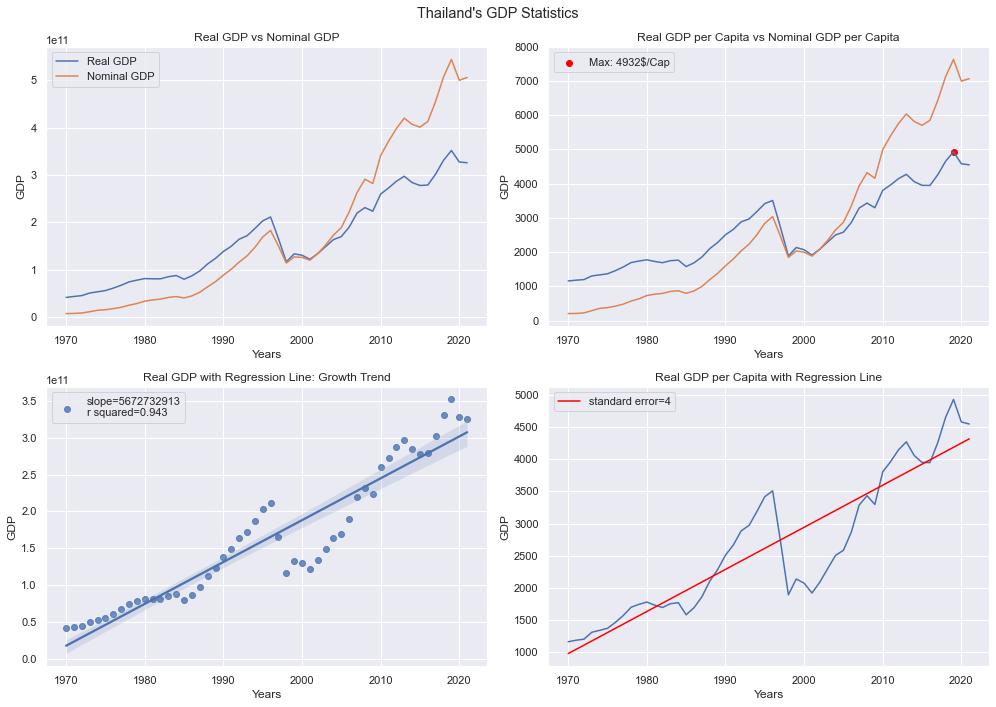

In [973]:
plot_together('Thailand')